1. Primero toca convertir la imagen en blanco y negro
2. Despues se puede contrastar con la real (https://www.electroschematics.com/pcb-defects-detection-opencv/)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8676f3a8e0>,
 Text(0.5, 1.0, 'Imagen'))

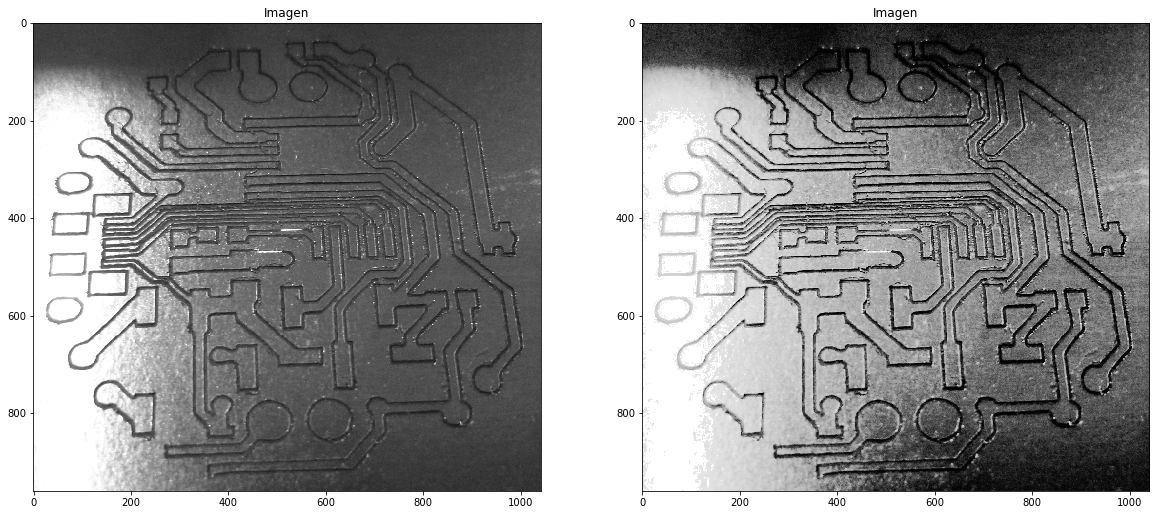

In [2]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
# SE CARGA LA IMAGEN EN ESCALA DE GRISES
img = cv2.imread('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB3.jpg',1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



equ = cv2.equalizeHist(hsv[:,:,2])

plt.figure(1,figsize=(20, 20))
plt.subplot(121), plt.imshow(hsv[:,:,2], cmap='gray'), plt.title('Imagen')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Imagen')





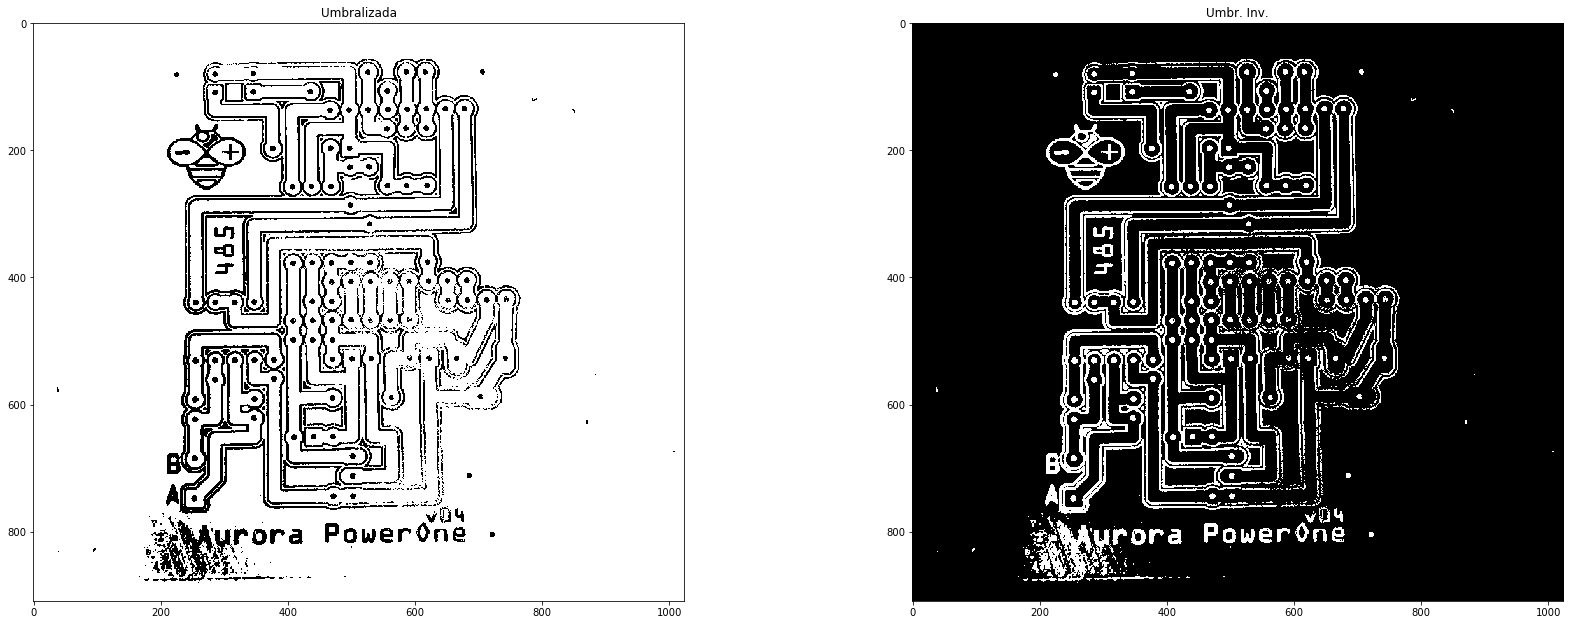

In [50]:
# UMBRALIZACION DE UNA IMAGEN

# SE CARGAN LAS IMAGENES 
img1 = cv2.imread('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB1.jpg',0)

width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)

#DIVISION POR UNA CONSTANTE
C=2 #Valor de la constante
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=116 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : 
            img_umbral[i,j] = 0
            img_umbral_inv[i,j] = 255
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img1[i,j] > IGMax: IGMax = img1[i,j]
        if img1[i,j] < IGmin: IGmin = img1[i,j]


#Visualizacion resulatado 
plt.figure(1,figsize=(25, 25))
plt.subplot(121), plt.imshow(img_umbral, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(img_umbral_inv, cmap='gray'), plt.title('Umbr. Inv.')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

Adaptive treshold (gaussian)
Otsu's method


(<matplotlib.axes._subplots.AxesSubplot at 0x7f866cd5f340>,
 Text(0.5, 1.0, 'Umbr. Inv.'))

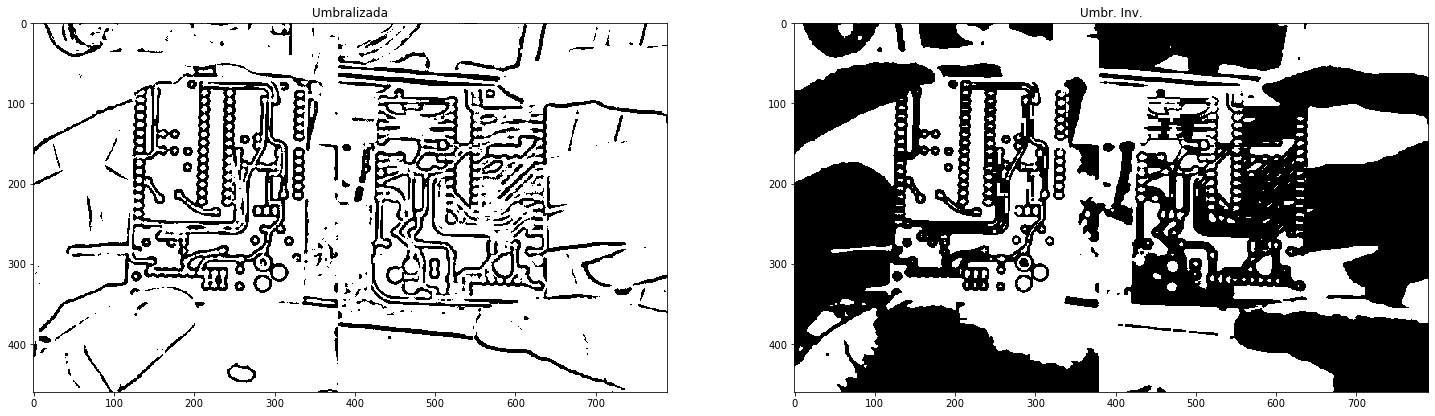

In [45]:
#Adaptative thersholding
# SE CARGAN LAS IMAGENES 
img2 = cv2.imread('/home/user/Documents/UN/TIA/Proyecto/PCBMillQualityControl/TestPics/PCB2.jpeg',0)
img2 = cv2.medianBlur(img2,5)

th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,10)
#Gaussiano
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,10)

nlbw = cv2.medianBlur(th2, 7)

blur = cv2.GaussianBlur(img2,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(2,figsize=(25, 25))
plt.subplot(121), plt.imshow(th2, cmap='gray'), plt.title('Umbralizada')
plt.subplot(122), plt.imshow(th4, cmap='gray'), plt.title('Umbr. Inv.')

